# 지역을 기준으로 한 다양한 그래프 출력

In [34]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

시도별 환자수 그래프(바그래프)

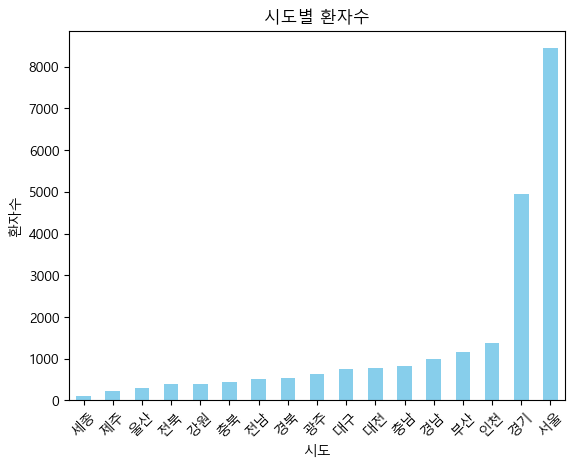

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc


rc('font', family='Malgun Gothic')

file_path = 'obesity2023_2.csv'
data = pd.read_csv(file_path, encoding='cp949')

sido_patient_count = data.groupby('시도')['환자수'].sum().sort_values()
sido_patient_count.plot(kind='bar', color='skyblue', title='시도별 환자수')
plt.xlabel('시도')
plt.ylabel('환자수')
plt.xticks(rotation=45)
plt.show()

시도별 환자수 그래프(원그래프)

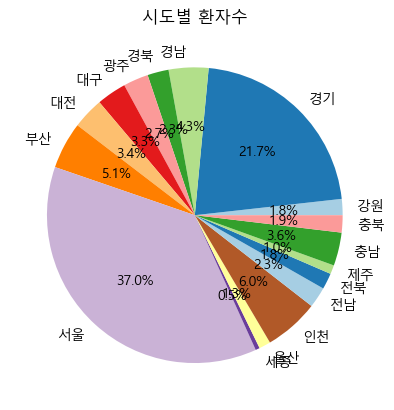

In [48]:
sido_cost_share = data.groupby('시도')['환자수'].sum()
sido_cost_share.plot(kind='pie', autopct='%1.1f%%', title='시도별 환자수', colors=plt.cm.Paired.colors)
plt.ylabel('')
plt.show()

지역별 환자수 그래프 (산점도)

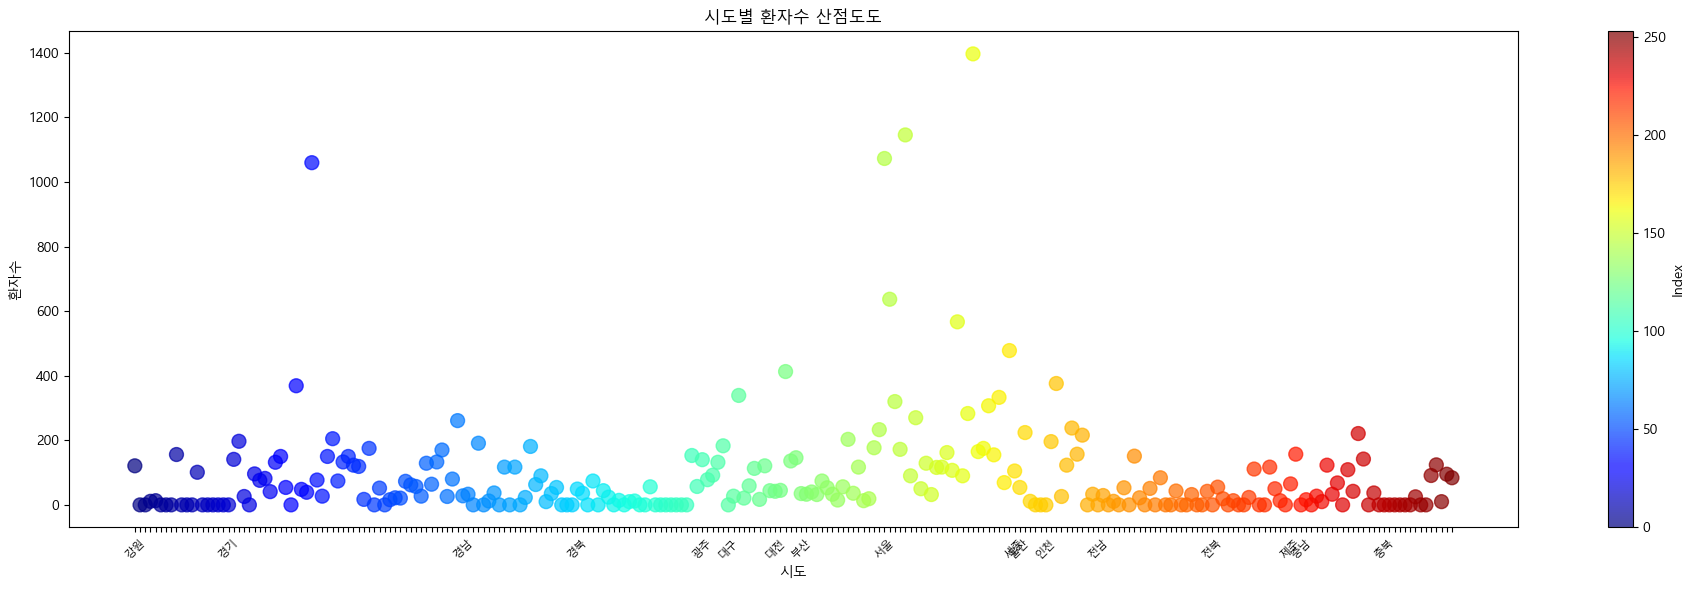

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# 시도-시군구 데이터 생성
data['시도-시군구'] = data['시도'] + '-' + data['시군구']
grouped_data = data.groupby('시도-시군구')['환자수'].sum().reset_index()

# x축: 중복 제거된 시도, y축: 환자 수
x_labels_full = grouped_data['시도-시군구'].str.split('-').str[0]

# 중복 제거된 시도 레이블 생성
x_labels = []
seen = set()
for label in x_labels_full:
    if label not in seen:
        x_labels.append(label)  # 중복되지 않은 경우 추가
        seen.add(label)
    else:
        x_labels.append('')  # 중복된 경우 공백 처리

# y축: 환자수
y = grouped_data['환자수']

# 색상 매핑
colors = range(len(grouped_data))
colormap = 'jet'
size = 100


plt.figure(figsize=(19, 6))
plt.scatter(x=range(len(grouped_data)), y=y, alpha=0.7, c=colors, cmap=colormap, s=size)
plt.title('시도별 환자수 산점도도')
plt.xlabel('시도')
plt.ylabel('환자수')
plt.xticks(ticks=range(len(grouped_data)), labels=x_labels, rotation=45, fontsize=8)  # x축에 중복 제거된 시도만 표시
plt.colorbar(label='Index')
plt.tight_layout()
plt.show()


city에 시구를 입력해놓으면 그에 맞는 환자수를 시군구별로 그리는 그래프(산점도)

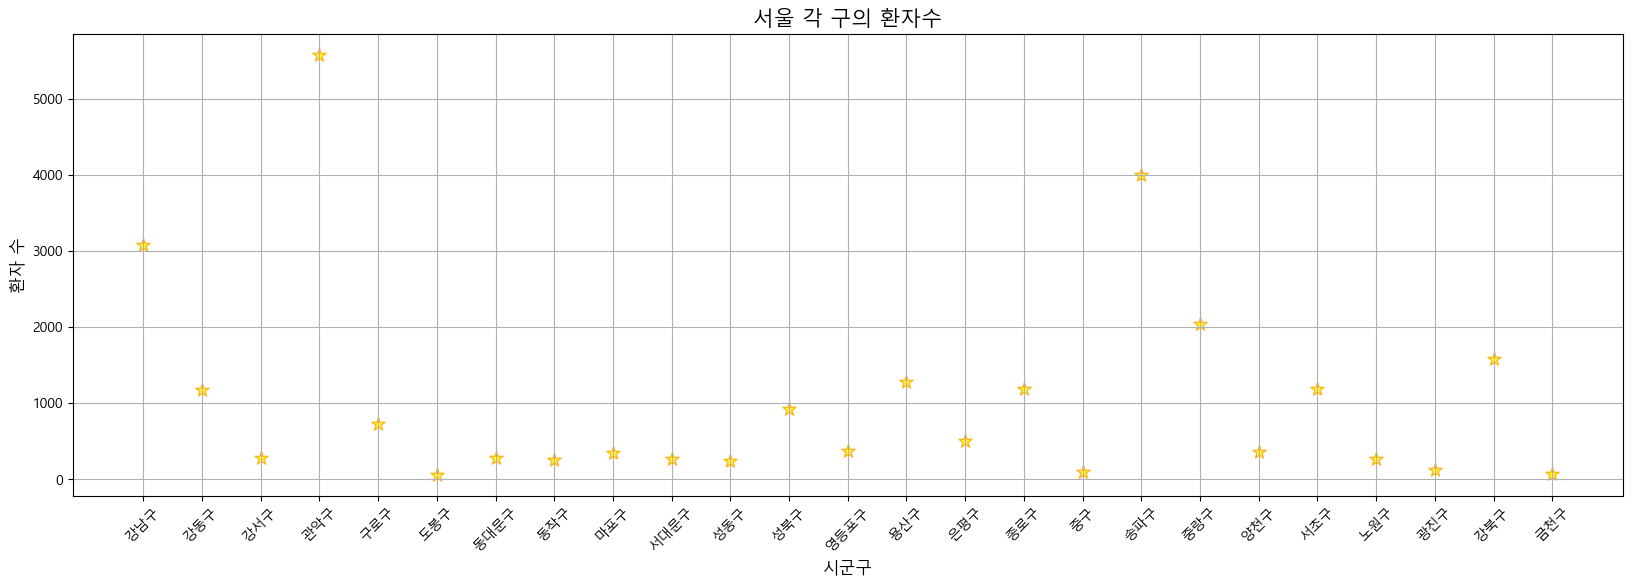

In [35]:
import csv
import matplotlib.pyplot as plt


f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)


header = next(data)

city = '서울'
gu = []
patient = []

for row in data:
    if city in row[1]:  
        gu.append(row[2])  
        patient.append(int(row[5]))  

patient_sum = []
gu_combined = []

for i in range(0, len(patient), 2):  
    if i + 1 < len(patient):  
        patient_sum.append(patient[i] + patient[i+1])  
        gu_combined.append(gu[i]) 
f.close()


plt.figure(figsize=(20, 6))  
plt.scatter(gu_combined, patient_sum, s=100, color='yellow',marker='*',alpha=0.8, edgecolors='orange')  
plt.title(f'{city} 각 구의 환자수', fontsize=15)
plt.xlabel('시군구', fontsize=12)
plt.ylabel('환자 수', fontsize=12) 
plt.xticks(rotation=45)
plt.grid(True)  
plt.show()

city에 시구를 입력해놓으면 그에 맞는 환자수를 시군구별로 그리는 그래프(꺾은선그래프)

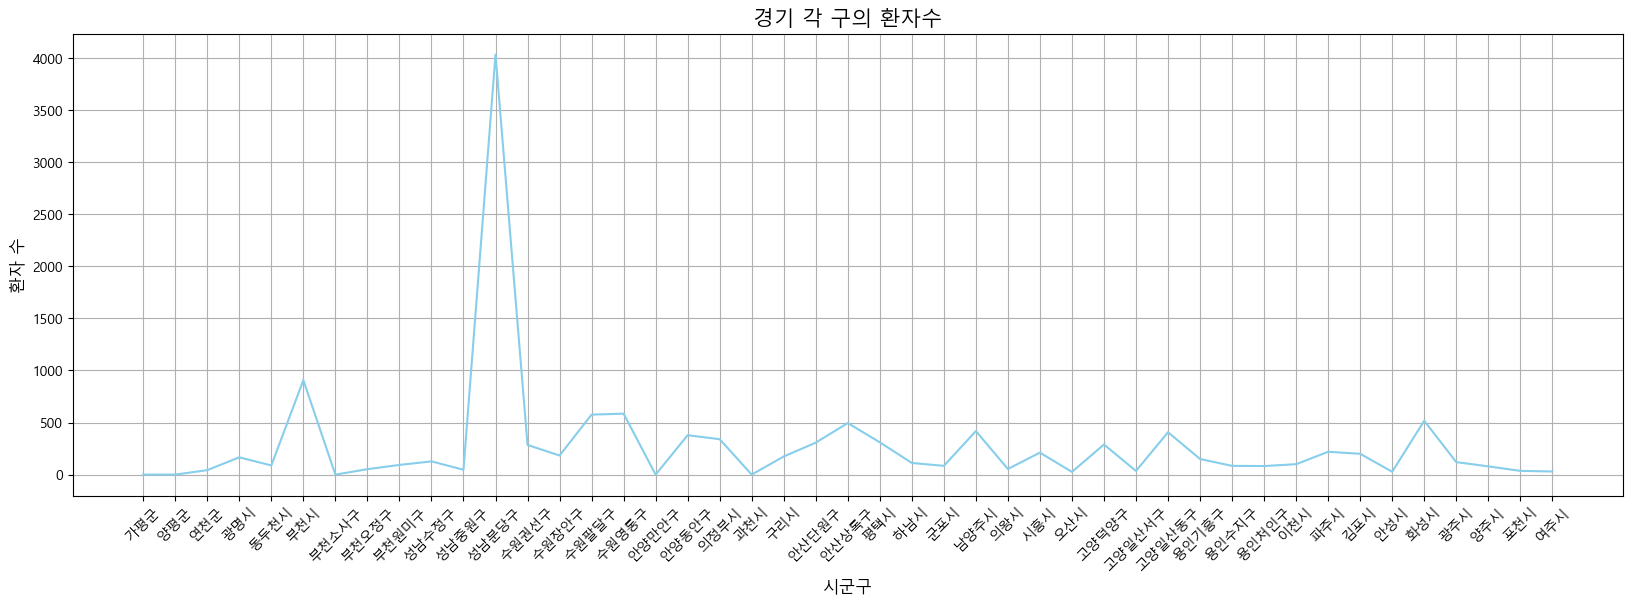

In [36]:
import csv
import matplotlib.pyplot as plt


f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)


header = next(data)

city = '경기'
gu = []
patient = []

for row in data:
    if city in row[1]:  
        gu.append(row[2])  
        patient.append(int(row[5]))  

patient_sum = []
gu_combined = []

for i in range(0, len(patient), 2):  
    if i + 1 < len(patient):  
        patient_sum.append(patient[i] + patient[i+1])  
        gu_combined.append(gu[i]) 
f.close()


plt.figure(figsize=(20, 6)) 
plt.plot(gu_combined, patient_sum, color='skyblue')  
plt.title(f'{city} 각 구의 환자수', fontsize=15)
plt.xlabel('시군구', fontsize=12)
plt.ylabel('환자 수', fontsize=12) 
plt.xticks(rotation=45)
plt.grid(True)  
plt.show()

city에 시구를 입력해놓으면 시구에 포함된 남성 환자수 여성 환자수를 각각 그리는 그래프(바그래프)

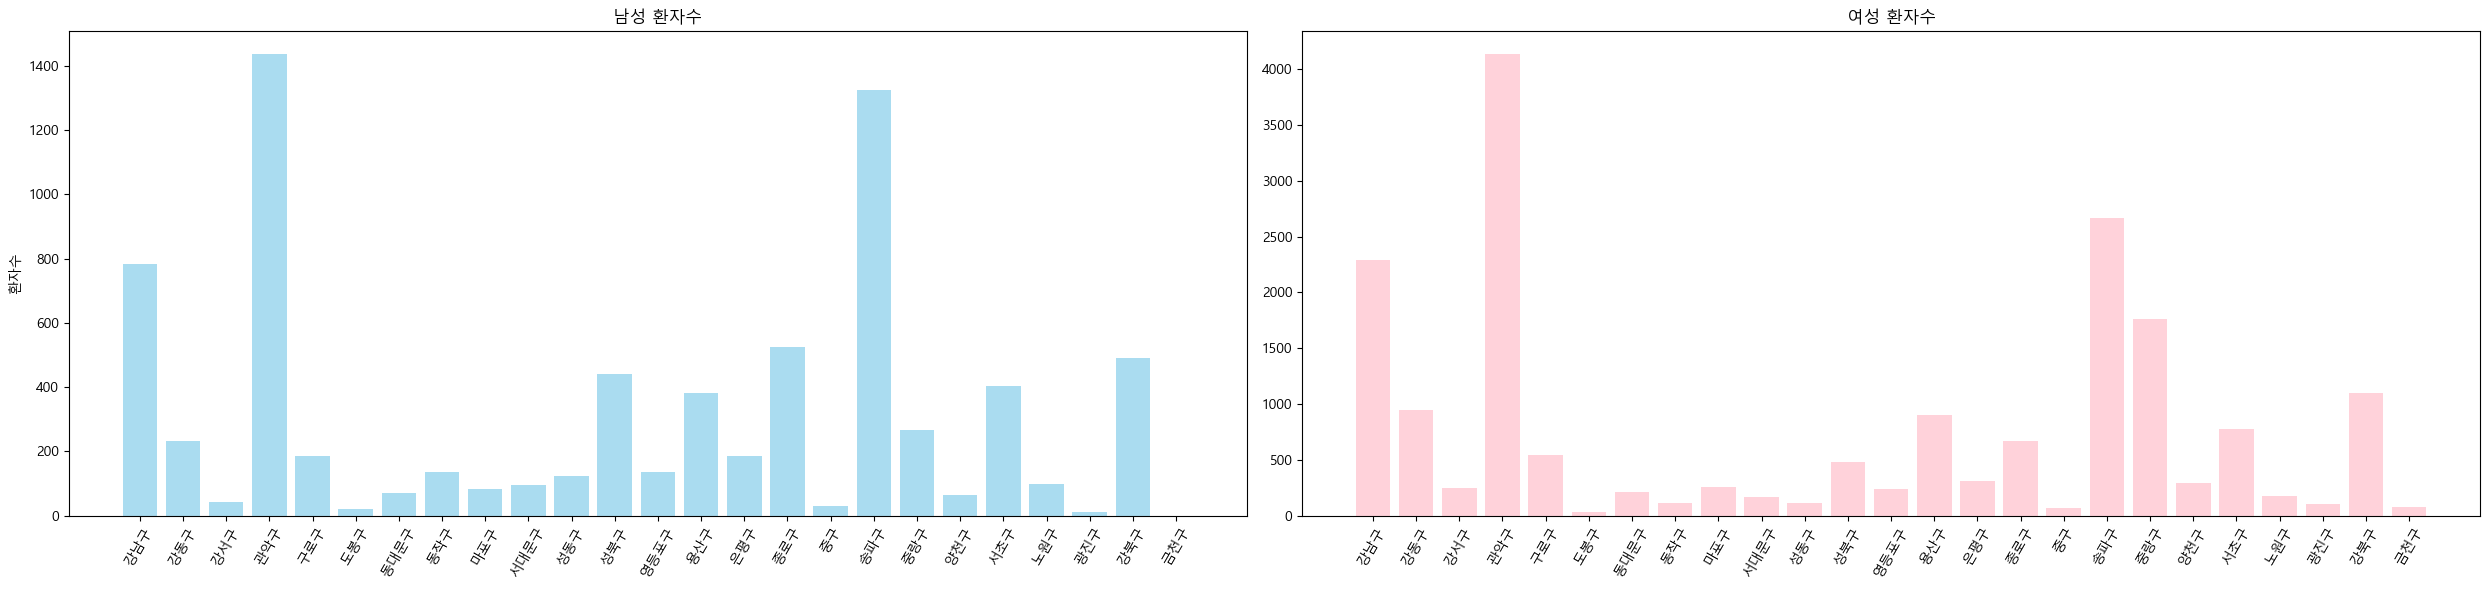

In [37]:
import csv
import matplotlib.pyplot as plt


f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)


header = next(data)

city = '서울'
gu = []
patient = []

for row in data:
    if city in row[1]:  
        gu.append(row[2])  
        patient.append(int(row[5]))  

patient_male = []
patient_female = []
gu_combined = []

for i in range(0, len(patient), 2):  
    if i + 1 < len(patient):  
        patient_male.append(patient[i])
        patient_female.append(patient[i+1])
        gu_combined.append(gu[i])  
f.close()


fig, axes = plt.subplots(1, 2, figsize=(25, 6))  


axes[0].bar(gu_combined, patient_male, color='skyblue', alpha=0.7)
axes[0].set_title('남성 환자수')
axes[0].set_ylabel('환자수')
axes[0].tick_params(axis='x', rotation=60)


axes[1].bar(gu_combined, patient_female, color='pink', alpha=0.7)
axes[1].set_title('여성 환자수')
axes[1].tick_params(axis='x', rotation=60)


plt.tight_layout()
plt.show()

city에 시구를 입력해놓으면 시구에 포함된 남성 환자수 여성 환자수를 한 그래프에 표현(바그래프)

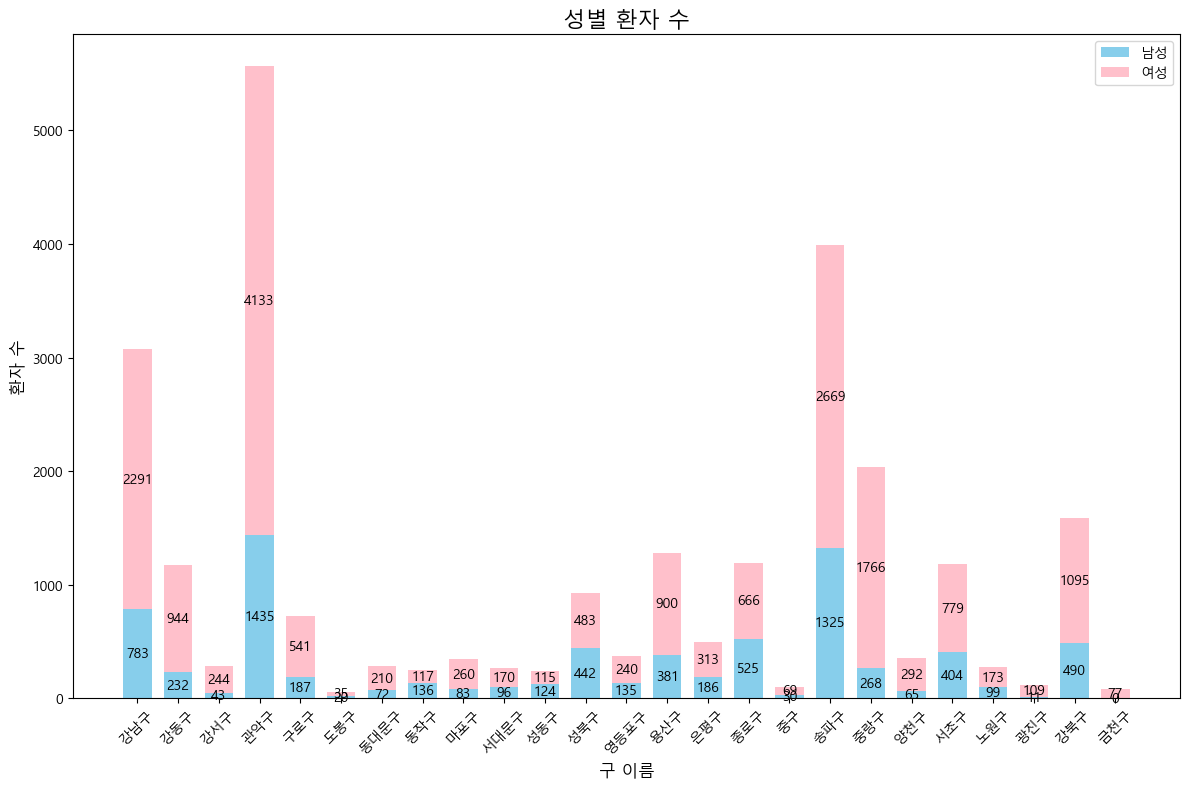

In [38]:
import csv
import matplotlib.pyplot as plt
import numpy as np


f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)


header = next(data)

city = '서울'
gu = []
patient = []

for row in data:
    if city in row[1]: 
        gu.append(row[2]) 
        patient.append(int(row[5]))  

f.close()


patient_male = []
patient_female = []
gu_combined = []

for i in range(0, len(patient), 2):  
    if i + 1 < len(patient):  
        patient_male.append(patient[i])
        patient_female.append(patient[i + 1])
        gu_combined.append(gu[i])  # 구 이름 추가

# 데이터 준비
species = gu_combined
sex_counts = {
    '남성': np.array(patient_male),
    '여성': np.array(patient_female),
}
width = 0.7  # 막대 폭 설정

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(len(species))  # 초기 바텀 값 설정

# 색 변경: 남성은 'blue', 여성은 'pink'로 설정
for sex, sex_count in sex_counts.items():
    if sex == '남성':
        color = 'skyblue'  # 남성은 파란색
    else:
        color = 'pink'  # 여성은 분홍색
        
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom, color=color)
    bottom += sex_count  # 각 성별의 값을 쌓아 올리기

    # 막대 내부에 값 표시
    ax.bar_label(p, label_type='center')


ax.set_title('성별 환자 수', fontsize=16)
ax.set_ylabel('환자 수', fontsize=12)
ax.set_xlabel('구 이름', fontsize=12)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


city에 시구를 입력해놓으면 시구에 포함된 남성 환자수 여성 환자수를 원그래프로 표현

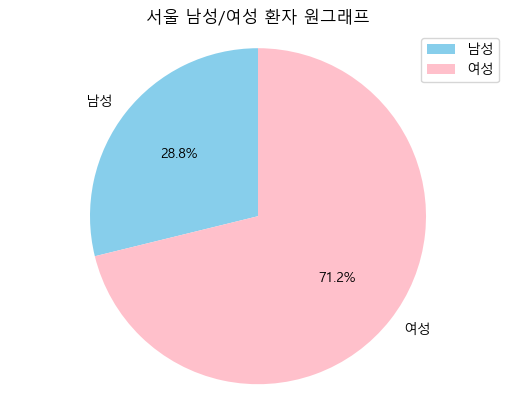

In [39]:
import csv
import matplotlib.pyplot as plt
import numpy as np


f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)


header = next(data)

city = '서울'
gu = []
patient = []

for row in data:
    if city in row[1]: 
        gu.append(row[2])  
        patient.append(int(row[5])) 

f.close()


patient_male = []
patient_female = []
gu_combined = []

for i in range(0, len(patient), 2):  
    if i + 1 < len(patient):  
        patient_male.append(patient[i])
        patient_female.append(patient[i + 1])
        gu_combined.append(gu[i])  


total_male = sum(patient_male)
total_female = sum(patient_female)


labels = ['남성', '여성']
data = [total_male, total_female]
colors = ['skyblue', 'pink']

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)



ax.axis('equal')


ax.set_title(f'{city} 남성/여성 환자 원그래프')


plt.legend()
plt.show()


city에 시구를, gu에 시군구를 입력해두면 그에 포함된 전체 환자수를 출력

In [40]:
import csv

f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

city = '서울'
gu = '강동구'
result = []
for row in data :
    if city in row[1] and gu in row[2] :
            result.append(int(row[5]))

f.close()
print(result[0]+ result[1],"명")

1176 명


city에 시구를, gu에 시군구를 입력해두면 그에 맞는 남성/여성 환자수 그래프 출력(바그래프)

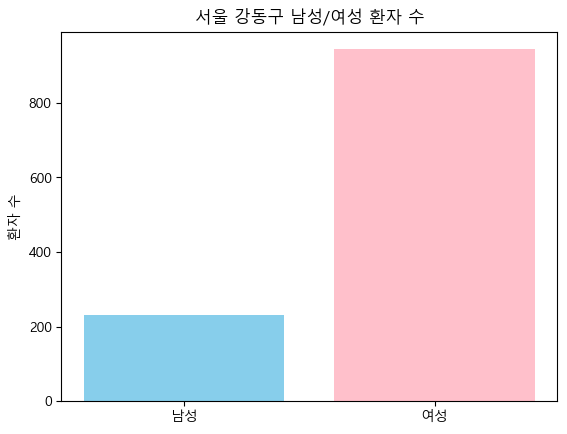

In [41]:
import csv

f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

city = '서울'
gu = '강동구'
result = []
for row in data :
    if city in row[1] and gu in row[2] :
            result.append(int(row[5]))

f.close()

labels = ['남성', '여성']

plt.bar(labels, result, color=['skyblue', 'pink'])
plt.title(f'{city} {gu} 남성/여성 환자 수')
plt.ylabel('환자 수')
plt.show()

city와 gu를 입력받아 그에맞는 데이터를 출력

In [42]:
import csv
import matplotlib.pyplot as plt

f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)


city = input('시도를 입력하시오: ')
#ex)서울
gu = input('시군구를 입력하시오: ')
#ex)서대문구

filtered_data = []
for row in data:
    if city == row[1] and gu == row[2]:  
        filtered_data.append(row)



if filtered_data:
    print("필터링된 데이터:")
    for row in filtered_data:
        print(row)
else:
    print(f"{city}의 {gu}에 해당하는 데이터가 없습니다.")


f.close()

필터링된 데이터:
['2023', '서울', '서대문구', '남', '36', '96', '19725110']
['2023', '서울', '서대문구', '여', '71', '170', '9380530']


city와 gu를 입력받아 그에맞는 남성 환자수와 여성 환자수 출력

In [43]:
import csv
import matplotlib.pyplot as plt

f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)


city = input('시도를 입력하시오: ')
#ex)서울
gu = input('시군구를 입력하시오: ')
#ex)서대문구

filtered_data = []
for row in data:
    if city == row[1] and gu == row[2]:  
        filtered_data.append(row[5])



if filtered_data:
    print(f"{city} {gu} 남자 : ", filtered_data[0], '명, 여자 : ', filtered_data[1],'명')
else:
    print(f"{city}의 {gu}에 해당하는 데이터가 없습니다.")

# 파일 닫기
f.close()

서울 서대문구 남자 :  96 명, 여자 :  170 명


city와 gu를 입력받아 그에맞는 남성 환자수와 여성 환자수를 그래프로 출력(바그래프)

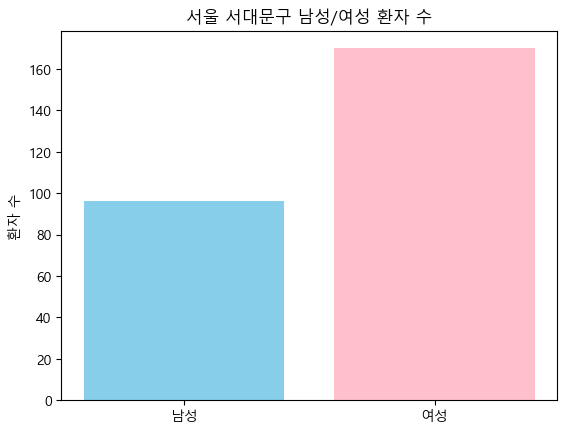

In [44]:
import csv
import matplotlib.pyplot as plt

f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)


city = input('시도를 입력하시오: ')
#ex)서울
gu = input('시군구를 입력하시오: ')
#ex)서대문구

filtered_data = []
for row in data:
    if city == row[1] and gu == row[2]:  
        filtered_data.append(row[5])

male = int(filtered_data[0])
female = int(filtered_data[1])
 
result = [male, female]
lables = ['남성', '여성']

plt.bar(labels,result, color=['skyblue', 'pink'])
plt.title(f"{city} {gu} 남성/여성 환자 수")
plt.ylabel('환자 수')
plt.show()


city와 gu를 입력받아 그에맞는 남성 환자수와 여성 환자수를 그래프로 출력(원그래프)

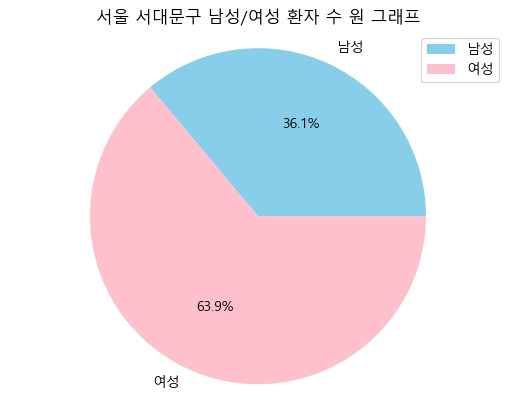

In [45]:
import csv
import matplotlib.pyplot as plt

f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)


city = input('시도를 입력하시오: ')
#ex)서울
gu = input('시군구를 입력하시오: ')
#ex)서대문구

filtered_data = []
for row in data:
    if city == row[1] and gu == row[2]:  
        filtered_data.append(row[5])

male = int(filtered_data[0])
female = int(filtered_data[1])
 
result = [male, female]
lables = ['남성', '여성']

fig, ax = plt.subplots()
ax.pie(result, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'pink'])



ax.axis('equal')


ax.set_title(f"{city} {gu} 남성/여성 환자 수 원 그래프")

plt.legend()
plt.show()

각 시도별 환자 1명당 요양급여비용 그래프 (산점도)

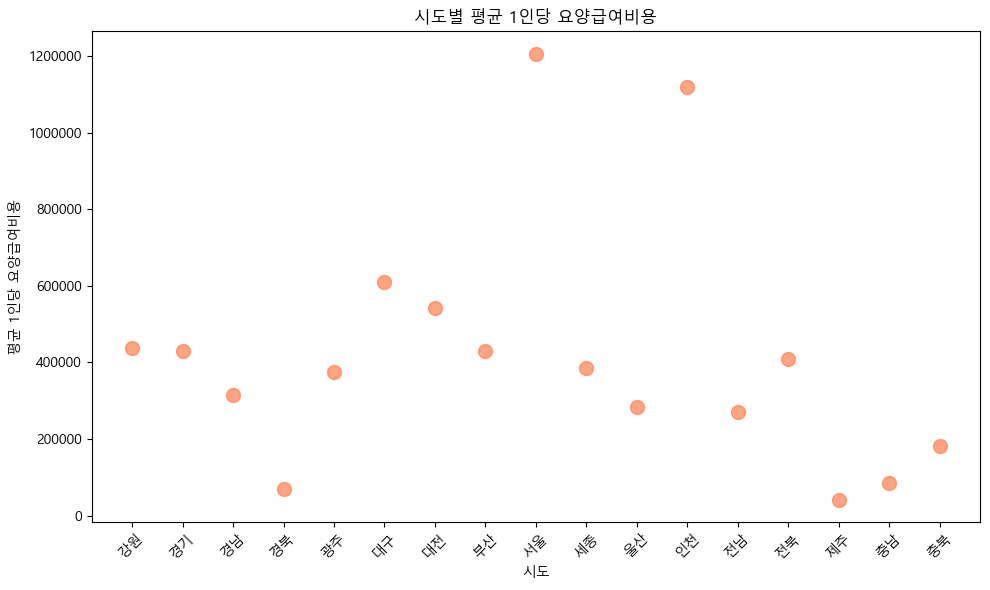

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = r'obesity2023_2.csv'
data = pd.read_csv(file_path, encoding='cp949')

# 1인당 요양급여비용
data['요양급여비용_1인당'] = data['요양급여비용총액'] / data['환자수']

# 시도별 평균 요양급여비용 계산
avg_expense_per_city = data.groupby('시도')['요양급여비용_1인당'].mean()

# 산점도 데이터 준비
x = avg_expense_per_city.index  # 시도 (카테고리형 데이터)
y = avg_expense_per_city.values  # 시도별 평균 요양급여비용

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, c='coral',s = 100)
plt.title('시도별 평균 1인당 요양급여비용')
plt.xlabel('시도')
plt.ylabel('평균 1인당 요양급여비용')
plt.ticklabel_format(style='plain', axis='y') #y축이 10진수로 나오게 수정
plt.xticks(rotation=45)  # 시도 라벨이 겹치지 않도록 회전
plt.tight_layout()
plt.show()


각 시도 출력 후 각 지역 평균 비용 출력, 그에 맞는 그래프 출력(꺾은선 그래프)


index (시도): Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='시도')
values (평균비용): [ 437177.34030474  429503.56634355  314163.08161167   69304.167089
  375017.92442489  609572.04387753  542750.36989148  429021.77461938
 1206188.10729646  386827.06730769  283473.00847763 1119510.06528293
  270190.02250763  410110.8817617    40808.01271852   84472.41099684
  181360.96144325]


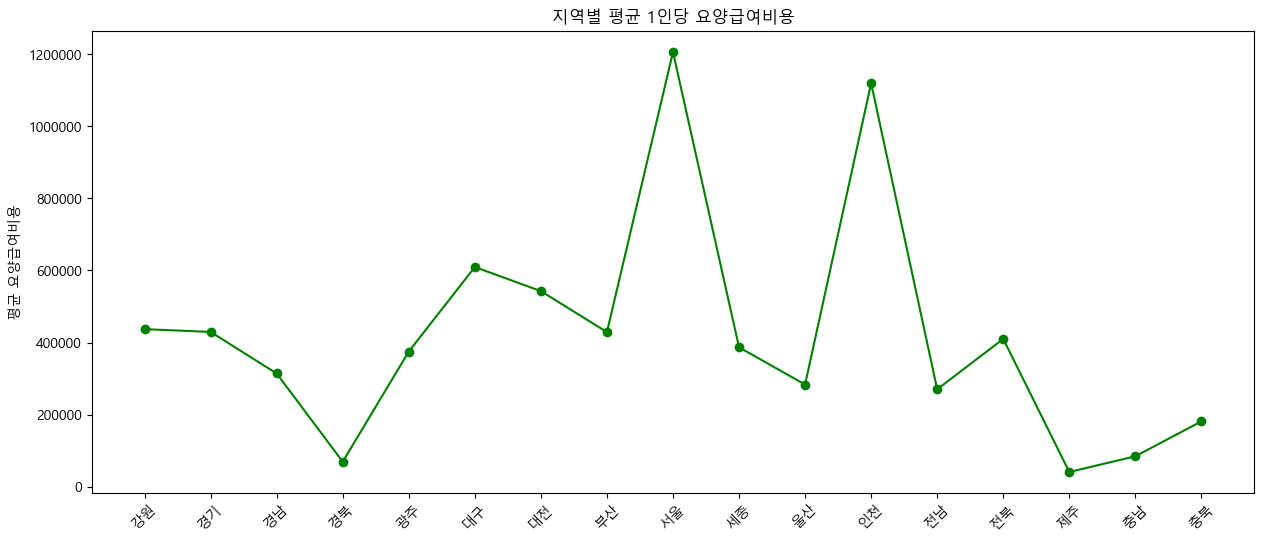

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('obesity2023_2.csv', encoding='euc-kr')

data['평균비용'] = data['요양급여비용총액'] / data['환자수']

avg = data.groupby('시도')['평균비용'].mean()

regions = avg.index
avg_costs = avg.values

print("\nindex (시도):", avg.index)  
print("values (평균비용):", avg.values)

plt.figure(figsize=(15, 6))  
plt.plot(regions, avg_costs, marker='o', color='green')
plt.title('지역별 평균 1인당 요양급여비용')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y') #y축이 10진수로 나오게 수정
plt.ylabel('평균 요양급여비용')
plt.show()

시구를 입력 받아 해당 시구의 시군구별 환자 1명당 평균 요양급여비용 출력

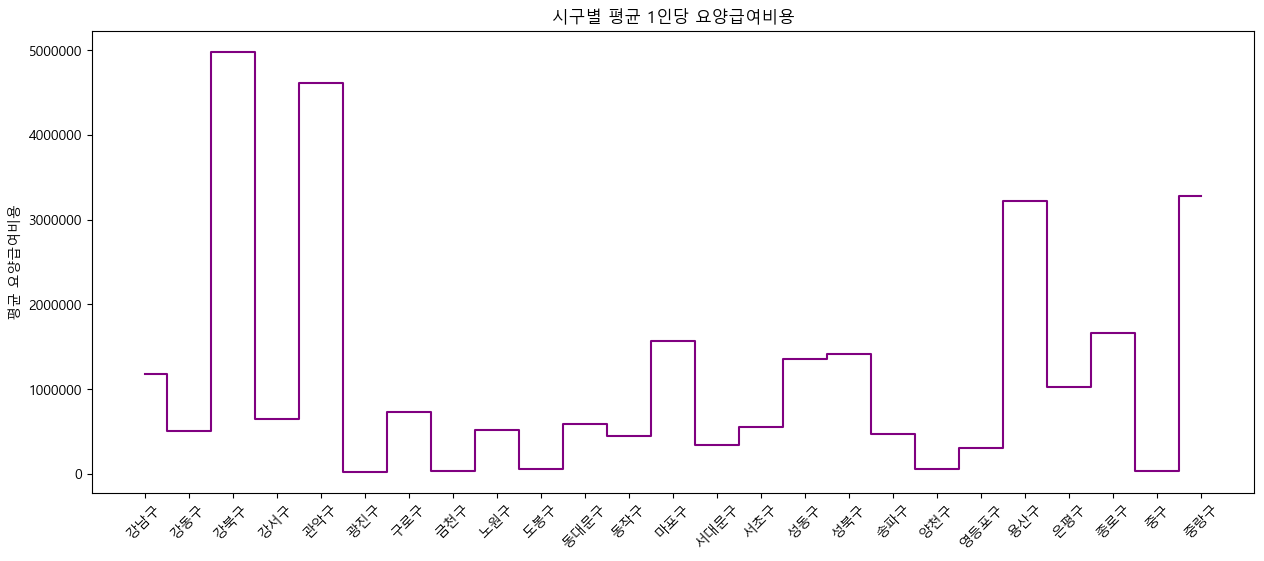

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('obesity2023_2.csv', encoding='euc-kr')

data['평균비용'] = data['요양급여비용총액'] / data['환자수']


input_region = input("시도를 입력하세요 (예: 부산): ")

filtered_data = data[data['시도'] == input_region]

if filtered_data.empty:
    print(f"입력한 시도 '{input_region}'에 해당하는 데이터가 없습니다.")
else:
   
    AVG = filtered_data.groupby('시군구')['평균비용'].mean()

    
    districts = AVG.index
    avg_costs = AVG.values

    plt.figure(figsize=(15, 6))  
    plt.step(districts, avg_costs, where='mid', color='purple')
    plt.title('시구별 평균 1인당 요양급여비용')
    plt.xticks(rotation=45)
    plt.ylabel('평균 요양급여비용')
    plt.ticklabel_format(style='plain', axis='y') #y축이 10진수로 나오게 수정
    plt.show()